## Import data

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


import colorama
from colorama import Fore, Style

import seaborn as sns

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Oil consumption at disaggregate level.csv',delimiter=';')

df.head()

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Austria,"0,24","0,26","0,28","0,32","0,35","0,39","0,43","0,46","0,50",...,"0,51","0,53","0,50","0,50","0,52","0,53","0,53","0,55","0,48","0,49"
1,Belgium,"0,68","0,69","0,76","0,89","1,02","1,12","1,14","1,24","1,30",...,"1,24","1,28","1,26","1,30","1,32","1,34","1,42","1,33","1,15","1,30"
2,Bulgaria,"0,16","0,18","0,23","0,27","0,33","0,38","0,42","0,44","0,46",...,"0,17","0,16","0,17","0,19","0,19","0,20","0,20","0,21","0,19","0,20"
3,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0,13","0,13","0,14","0,14","0,14","0,15","0,15","0,14","0,12","0,13"
4,Cyprus,"0,02","0,02","0,02","0,02","0,03","0,03","0,03","0,04","0,04",...,"0,11","0,10","0,10","0,10","0,11","0,11","0,11","0,11","0,09","0,10"


## Data Preprocessing and Handle Missings

In [3]:
#reorganize data columns
df1 = pd.melt(df, id_vars=["Country"], var_name="Year", value_name="Value")
df1.head()

,Country,Year,Value
0,Austria,1965,"0,24"
1,Belgium,1965,"0,68"
2,Bulgaria,1965,"0,16"
3,Croatia,1965,NaN
4,Cyprus,1965,"0,02"


In [4]:
#Remove the countries which are not in European Union
values = ['Iceland','Norway','Switzerland','Turkey','Ukraine', 'United Kingdom', 'Other Europe']
df1 = df1[df1.Country.isin(values) == False]
df1

,Country,Year,Value
0,Austria,1965,"0,24"
1,Belgium,1965,"0,68"
2,Bulgaria,1965,"0,16"
3,Croatia,1965,NaN
4,Cyprus,1965,"0,02"
...,...,...,...
1985,Slovakia,2021,"0,18"
1986,Slovenia,2021,"0,10"
1987,Spain,2021,"2,45"
1988,Sweden,2021,"0,54"


In [5]:
df1.dtypes

Country    object
Year       object
Value      object
dtype: object

In [6]:
df1.head()

,Country,Year,Value
0,Austria,1965,"0,24"
1,Belgium,1965,"0,68"
2,Bulgaria,1965,"0,16"
3,Croatia,1965,NaN
4,Cyprus,1965,"0,02"


In [7]:
df1.isnull().sum()

Country      0
Year         0
Value      135
dtype: int64

In [8]:
#convert datatype from string to float
df1["Value"] =[float(str(i).replace(',','.')) for i in df1["Value"]] 

In [9]:
# fill null data with the mean of each group
df1['Value']= df1.groupby('Country')['Value'].apply(lambda x: x.fillna(x.mean()))

In [10]:
#round up after comma
df1['Value']=round(df1['Value'],2) 

In [11]:
df1.dtypes

Country     object
Year        object
Value      float64
dtype: object

## Training and Testing the SVR model - Accuracy Metrics for Time Series Forecast

In [12]:
country_name=df1['Country'].unique()
print(country_name)

['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Netherlands'
 'North Macedonia' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Total Europe']


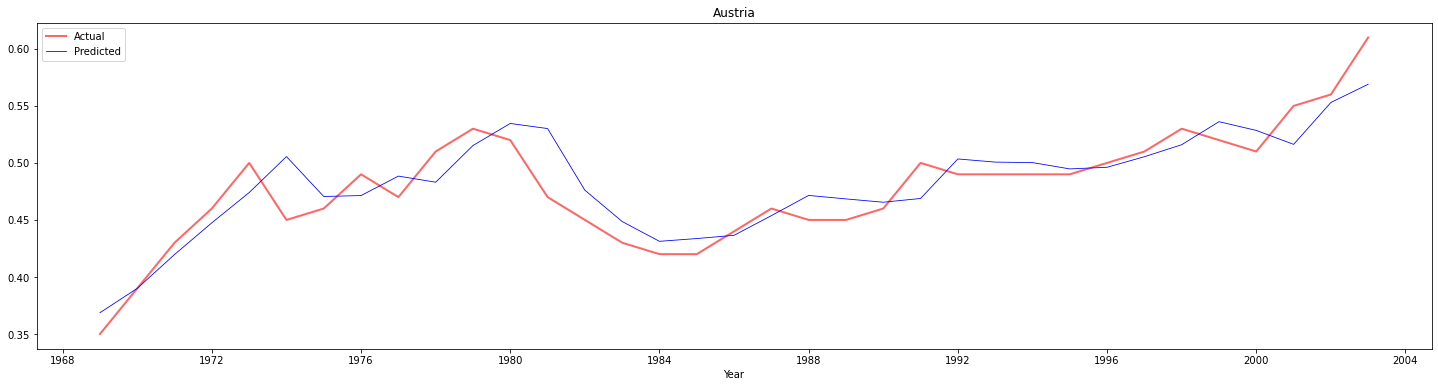

MAPE for training data: Austria 3.6956629275691677 %


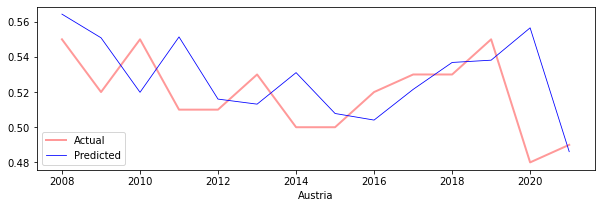

MAE for test data Austria : 0.02157046632646094
MAPE for test data  Austria : 0.04222620155582638
RMSE for test data Austria : 0.028671302325666993
MSE for test data Austria : 0.0008220435770497974


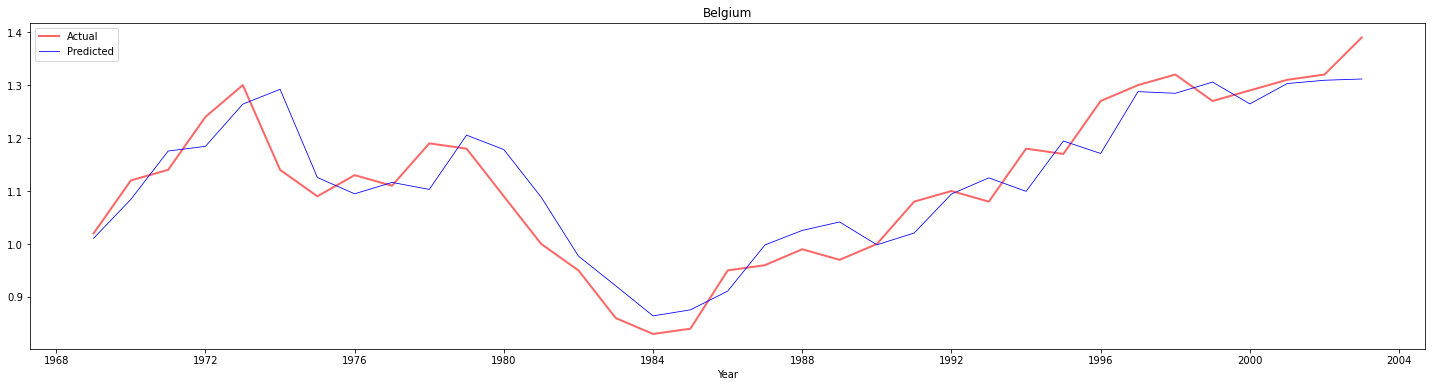

MAPE for training data: Belgium 4.0266123007047225 %


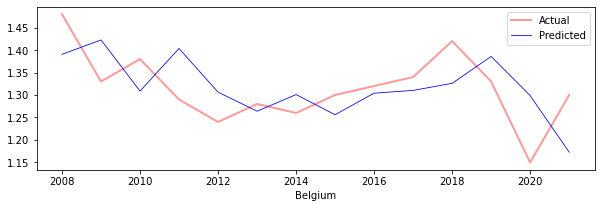

MAE for test data Belgium : 0.0718438730988201
MAPE for test data  Belgium : 0.05513327293559867
RMSE for test data Belgium : 0.08204449407738727
MSE for test data Belgium : 0.006731299008414436


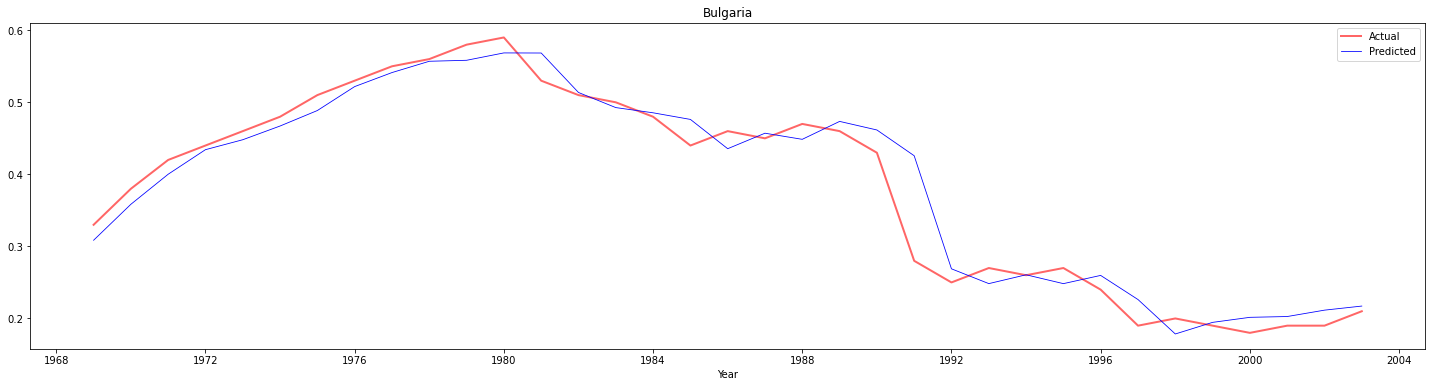

MAPE for training data: Bulgaria 6.54314722400743 %


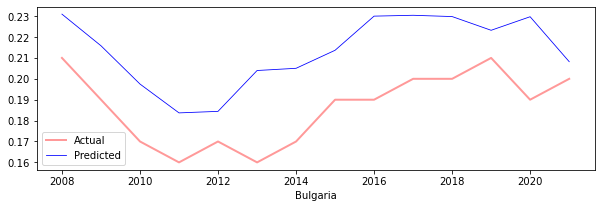

MAE for test data Bulgaria : 0.026883986373616886
MAPE for test data  Bulgaria : 0.14715760634622357
RMSE for test data Bulgaria : 0.028763560814825704
MSE for test data Bulgaria : 0.0008273424307481767


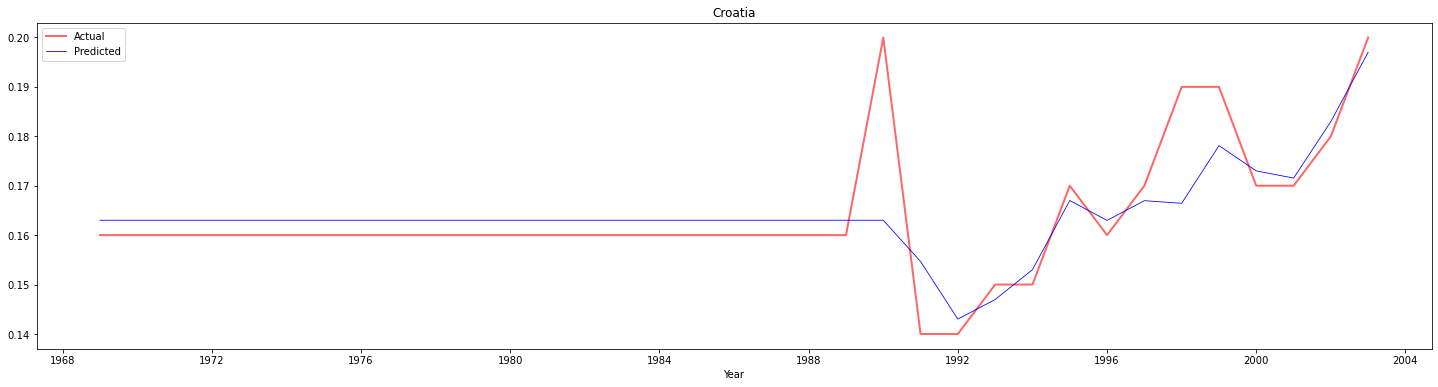

MAPE for training data: Croatia 2.9891709525874894 %


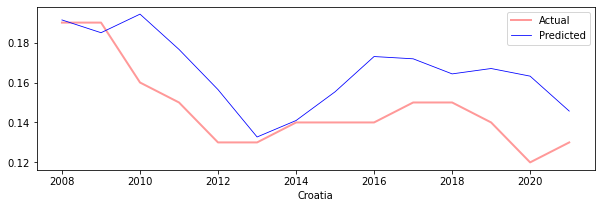

MAE for test data Croatia : 0.01912763736747484
MAPE for test data  Croatia : 0.1368822081356459
RMSE for test data Croatia : 0.023088716030420887
MSE for test data Croatia : 0.0005330888079334144


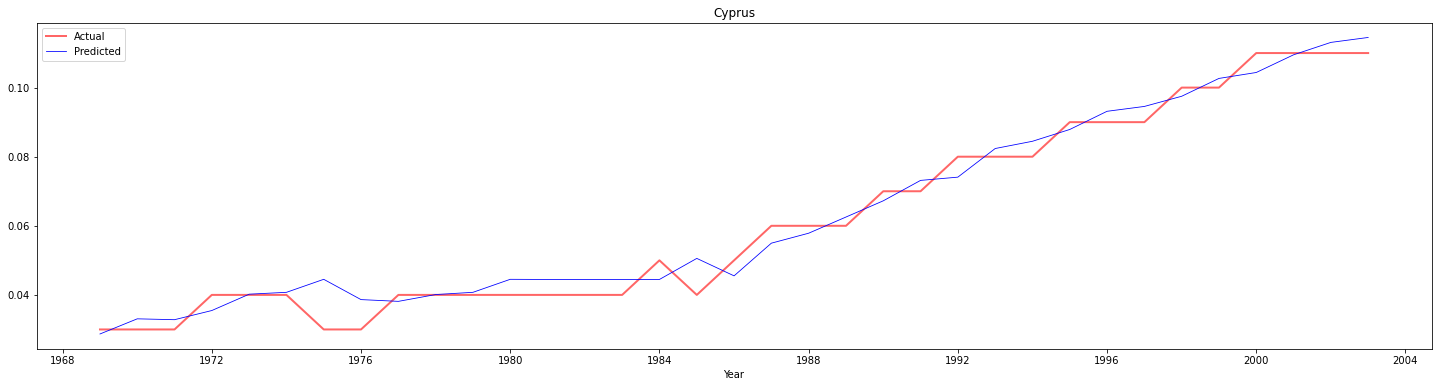

MAPE for training data: Cyprus 8.058847001940139 %


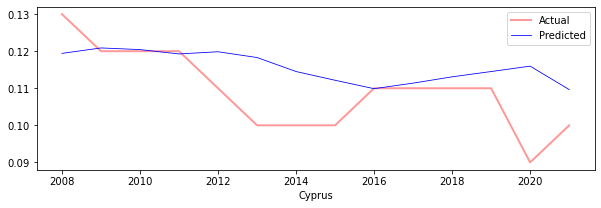

MAE for test data Cyprus : 0.008011254372928
MAPE for test data  Cyprus : 0.078952666307993
RMSE for test data Cyprus : 0.011028276476798885
MSE for test data Cyprus : 0.00012162288204871562


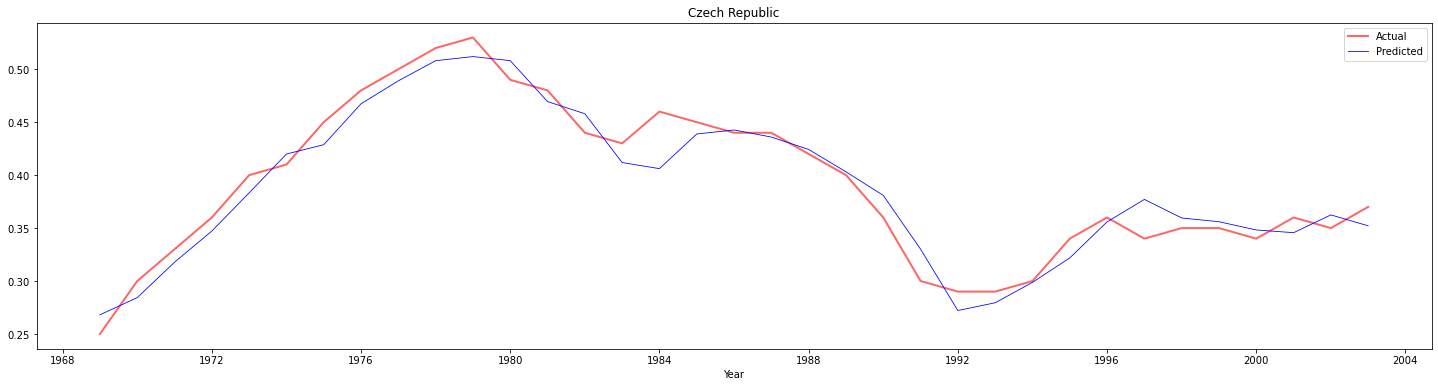

MAPE for training data: Czech Republic 3.8854891452835263 %


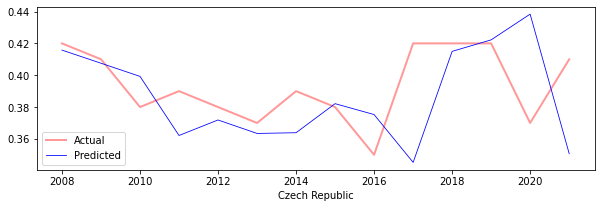

MAE for test data Czech Republic : 0.023694881515861275
MAPE for test data  Czech Republic : 0.06048979160936815
RMSE for test data Czech Republic : 0.03424428160716007
MSE for test data Czech Republic : 0.0011726708227904812


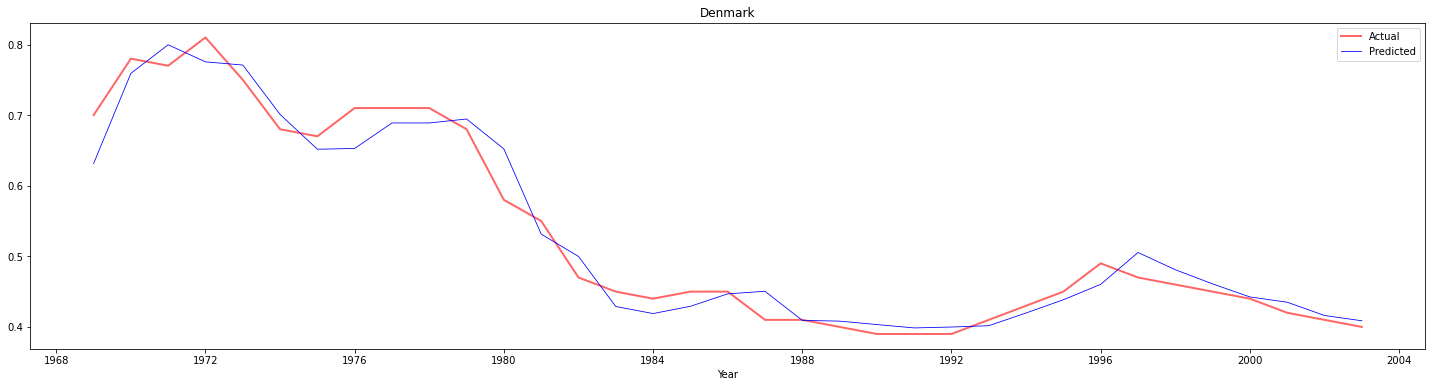

MAPE for training data: Denmark 3.9399323414340515 %


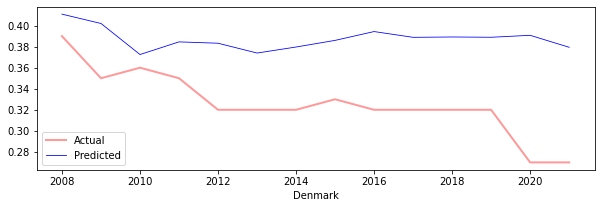

MAE for test data Denmark : 0.06174718874207837
MAPE for test data  Denmark : 0.1992913335115968
RMSE for test data Denmark : 0.06786364513250447
MSE for test data Denmark : 0.004605474330670497


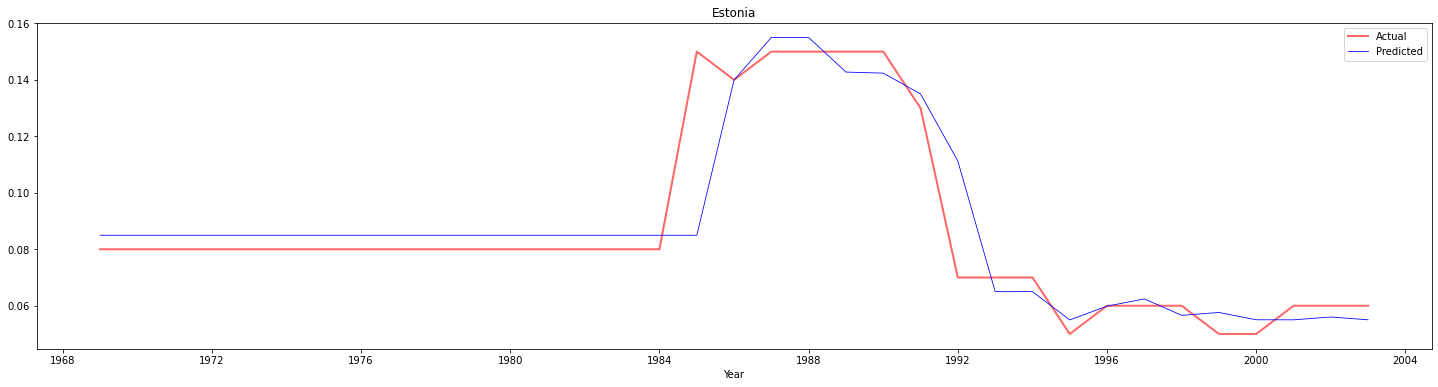

MAPE for training data: Estonia 8.707569032513211 %


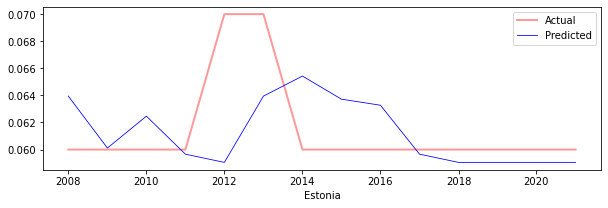

MAE for test data Estonia : 0.002886318317502374
MAPE for test data  Estonia : 0.04521467045053336
RMSE for test data Estonia : 0.0041052861496252
MSE for test data Estonia : 1.68533743703045e-05


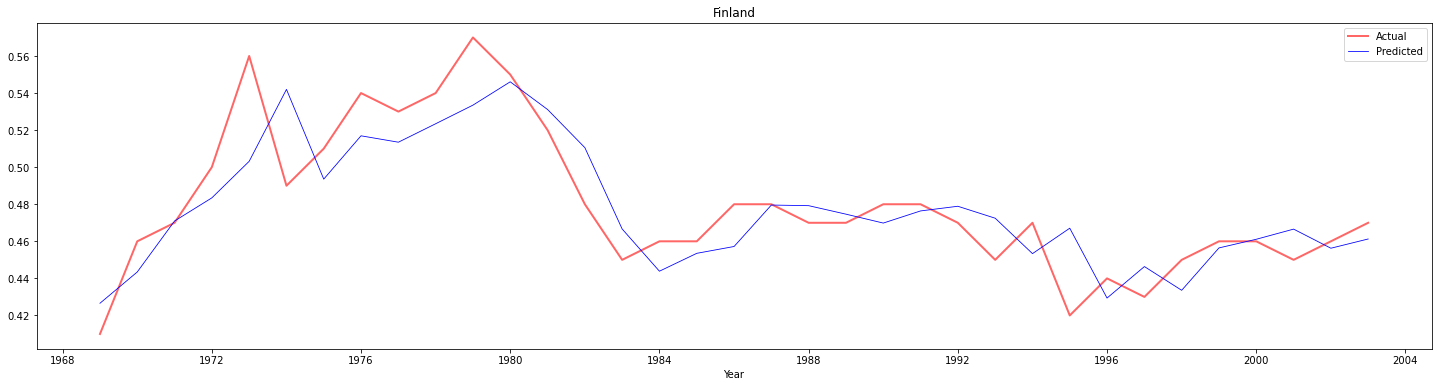

MAPE for training data: Finland 3.410541741078532 %


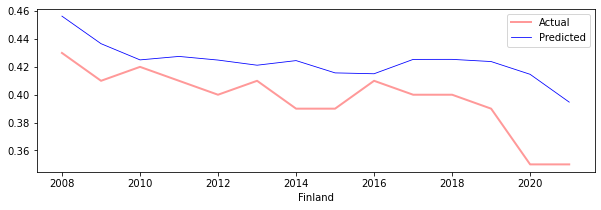

MAE for test data Finland : 0.026485109170691377
MAPE for test data  Finland : 0.06879806084655257
RMSE for test data Finland : 0.030434942005372233
MSE for test data Finland : 0.0009262856948703712


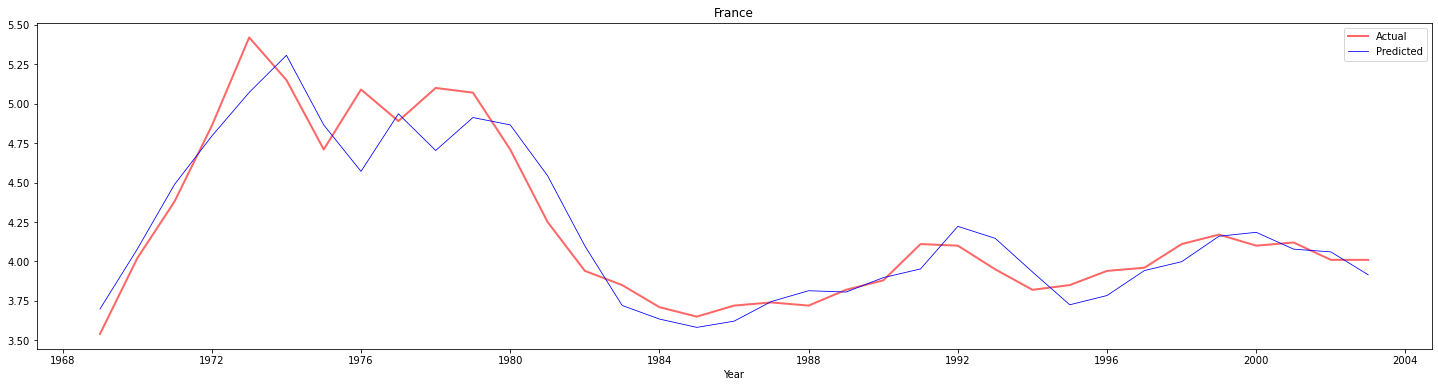

MAPE for training data: France 2.977724236495098 %


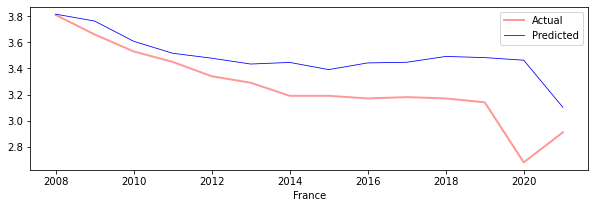

MAE for test data France : 0.2263649635266425
MAPE for test data  France : 0.07410394700052338
RMSE for test data France : 0.2906112084762327
MSE for test data France : 0.08445487449201636


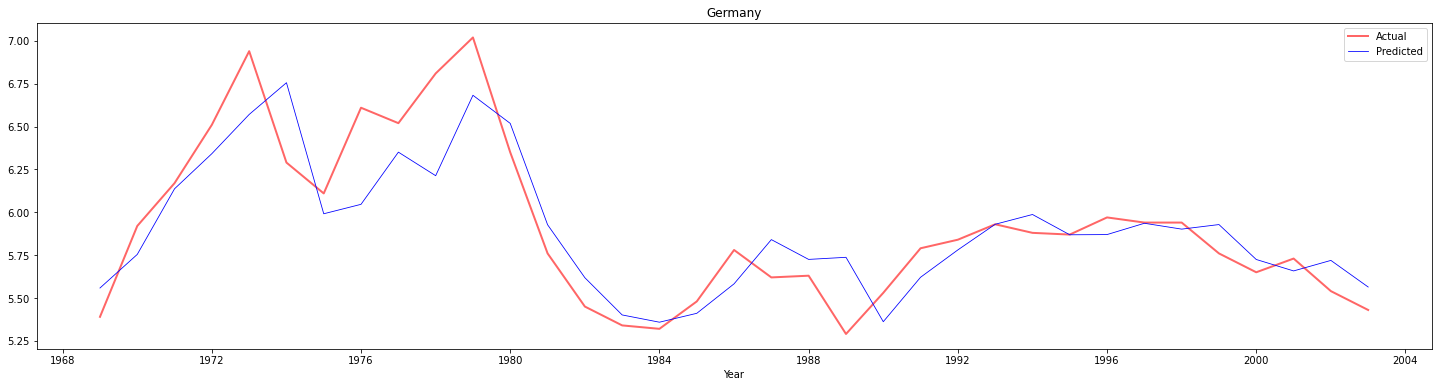

MAPE for training data: Germany 2.859878070008281 %


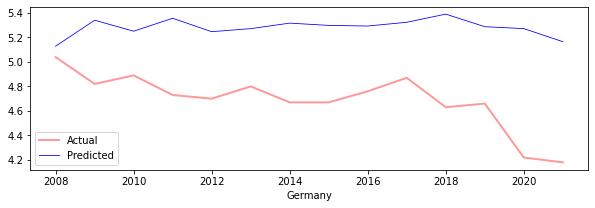

MAE for test data Germany : 0.5927451015472258
MAPE for test data  Germany : 0.1291249789942884
RMSE for test data Germany : 0.6364808207856087
MSE for test data Germany : 0.40510783522792215


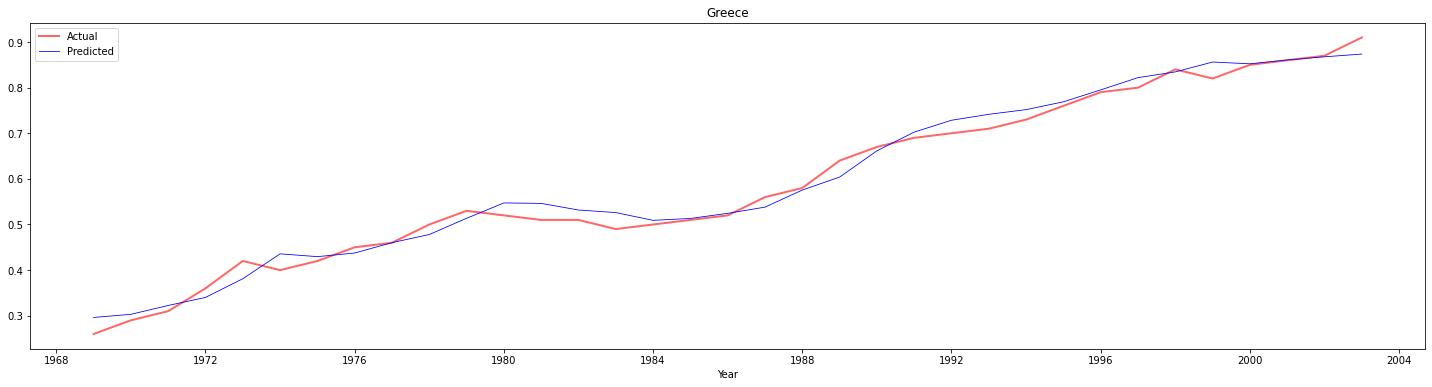

MAPE for training data: Greece 3.577002605057325 %


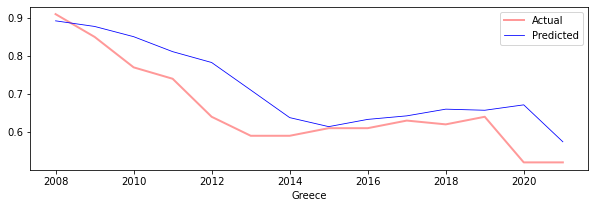

MAE for test data Greece : 0.0578834376112577
MAPE for test data  Greece : 0.09370136935133495
RMSE for test data Greece : 0.07476628407706915
MSE for test data Greece : 0.005589997234693002


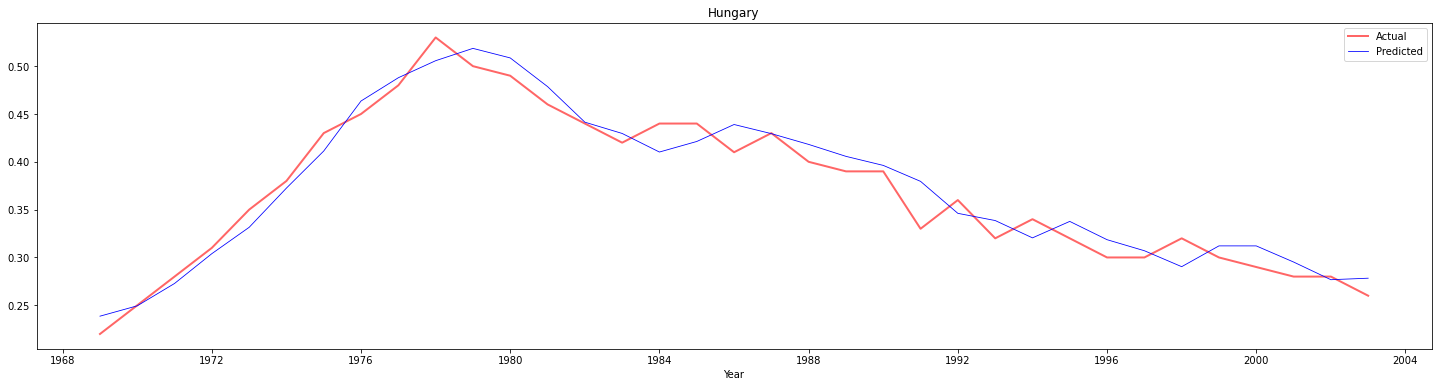

MAPE for training data: Hungary 4.447321810363095 %


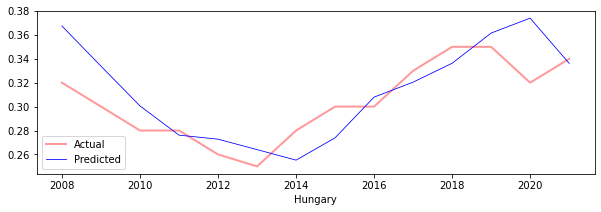

MAE for test data Hungary : 0.020270980834820918
MAPE for test data  Hungary : 0.06686001678755879
RMSE for test data Hungary : 0.02519220714580784
MSE for test data Hungary : 0.0006346473008772916


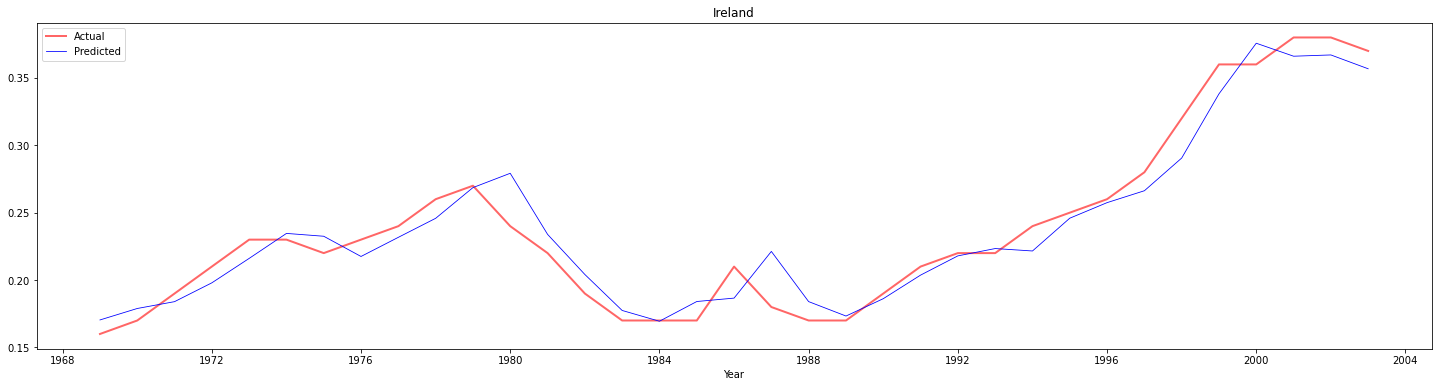

MAPE for training data: Ireland 5.41652115853081 %


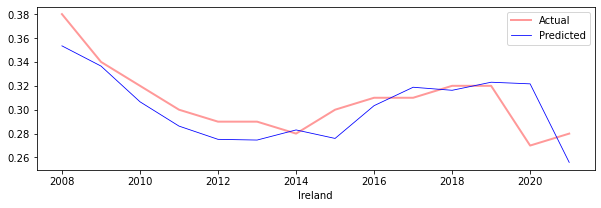

MAE for test data Ireland : 0.015168771753545742
MAPE for test data  Ireland : 0.050791836756945055
RMSE for test data Ireland : 0.019856912327190685
MSE for test data Ireland : 0.00039429696716973734


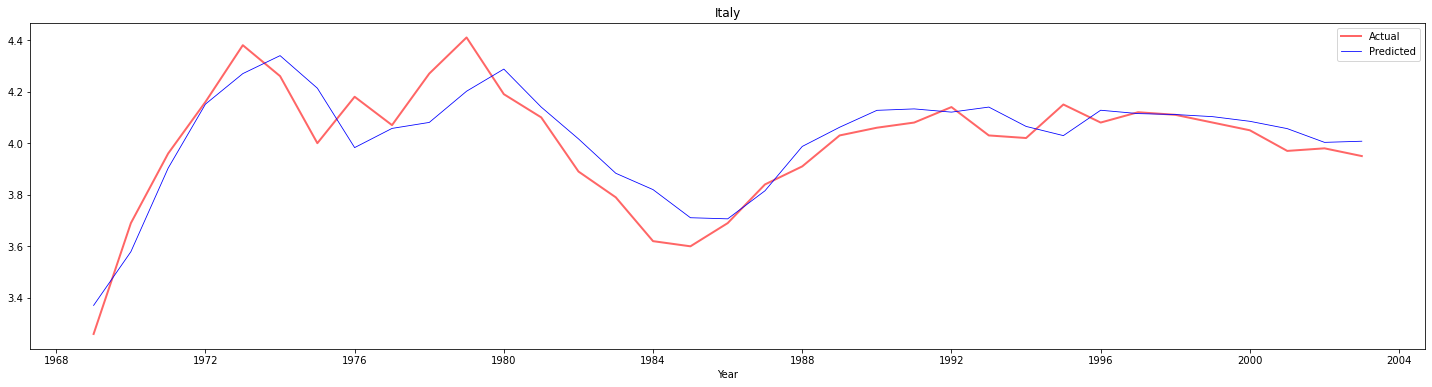

MAPE for training data: Italy 2.0164592126917005 %


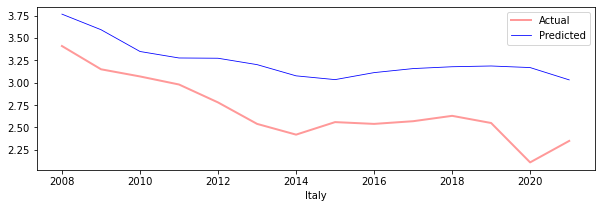

MAE for test data Italy : 0.5533639215034205
MAPE for test data  Italy : 0.2167560598616336
RMSE for test data Italy : 0.5851093730568242
MSE for test data Italy : 0.3423529784389499


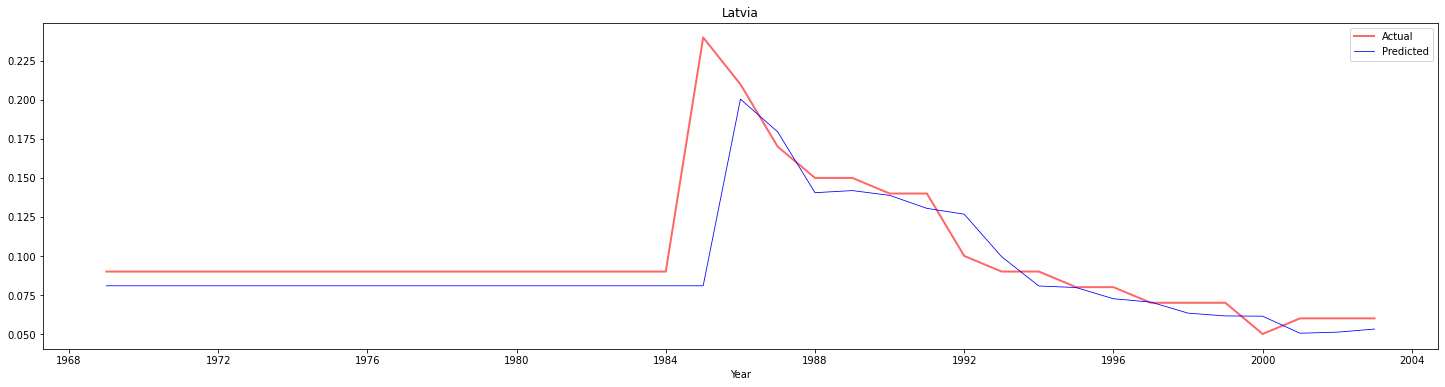

MAPE for training data: Latvia 11.483771728026605 %


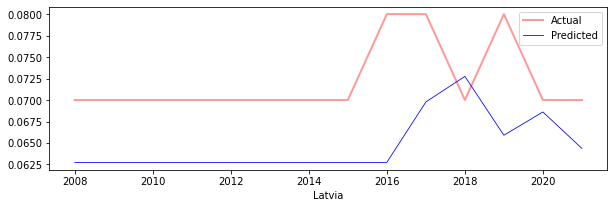

MAE for test data Latvia : 0.007816006612850953
MAPE for test data  Latvia : 0.10635402907026188
RMSE for test data Latvia : 0.008717344142836161
MSE for test data Latvia : 7.599208890463992e-05


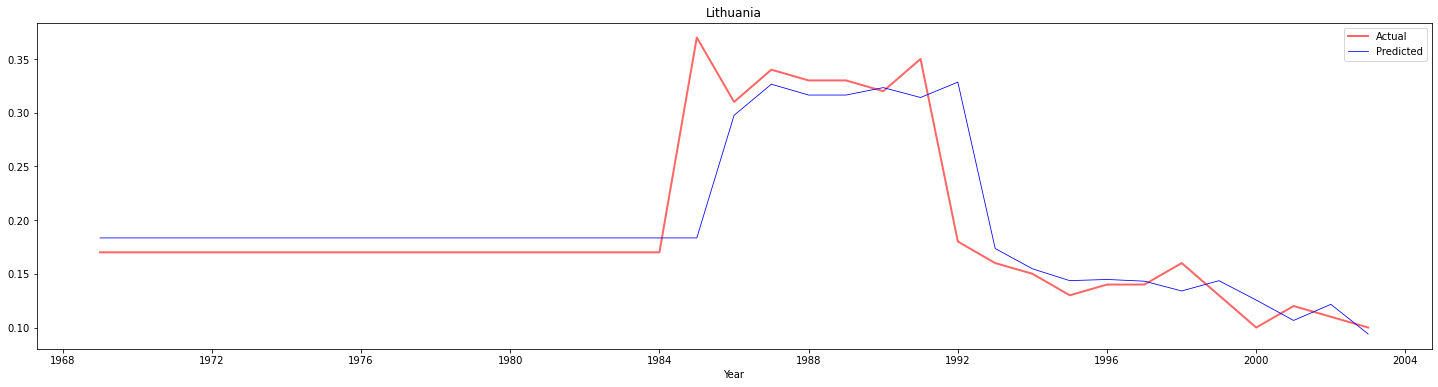

MAPE for training data: Lithuania 11.257063242910249 %


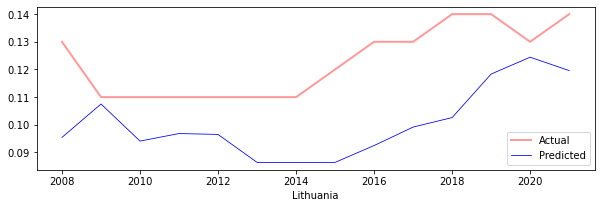

MAE for test data Lithuania : 0.022408401043752642
MAPE for test data  Lithuania : 0.1800033686646949
RMSE for test data Lithuania : 0.02495927317887434
MSE for test data Lithuania : 0.000622965317617676


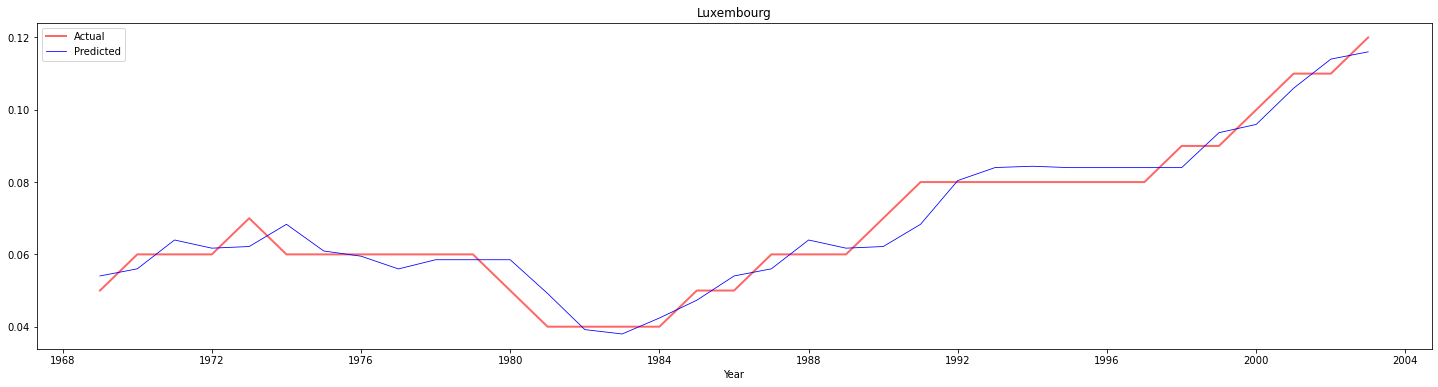

MAPE for training data: Luxembourg 6.376345474084022 %


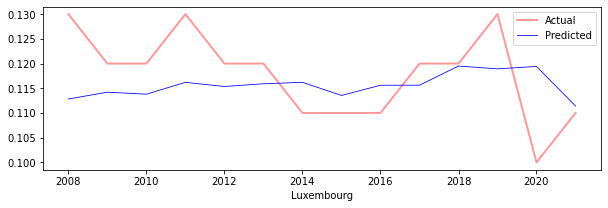

MAE for test data Luxembourg : 0.007416544388875537
MAPE for test data  Luxembourg : 0.06309674326758392
RMSE for test data Luxembourg : 0.009255223290678958
MSE for test data Luxembourg : 8.565915816032625e-05


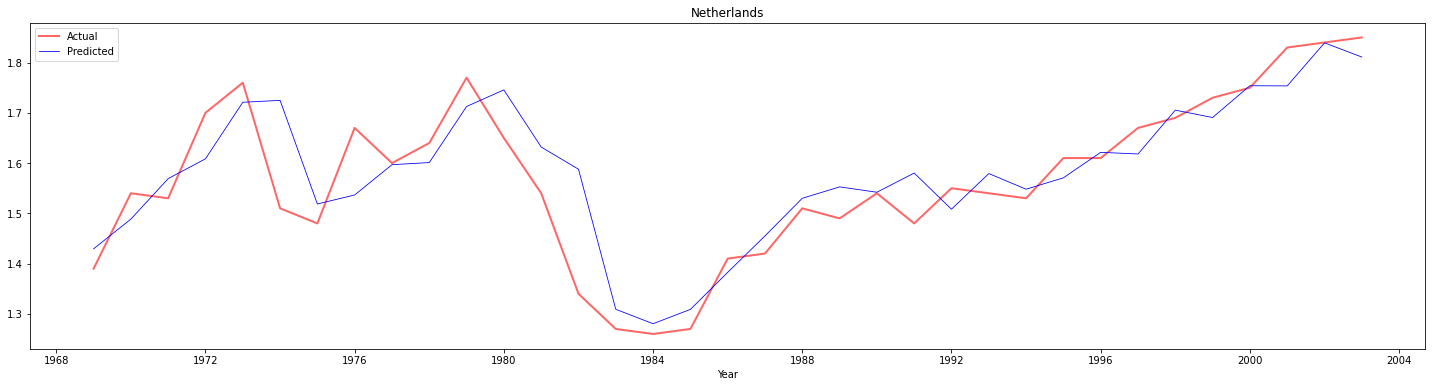

MAPE for training data: Netherlands 3.549264792981304 %


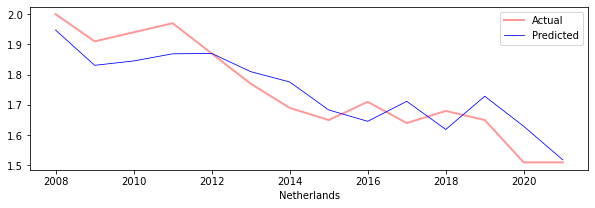

MAE for test data Netherlands : 0.06358517085264441
MAPE for test data  Netherlands : 0.03652661205119445
RMSE for test data Netherlands : 0.07160869549496719
MSE for test data Netherlands : 0.005127805270490935


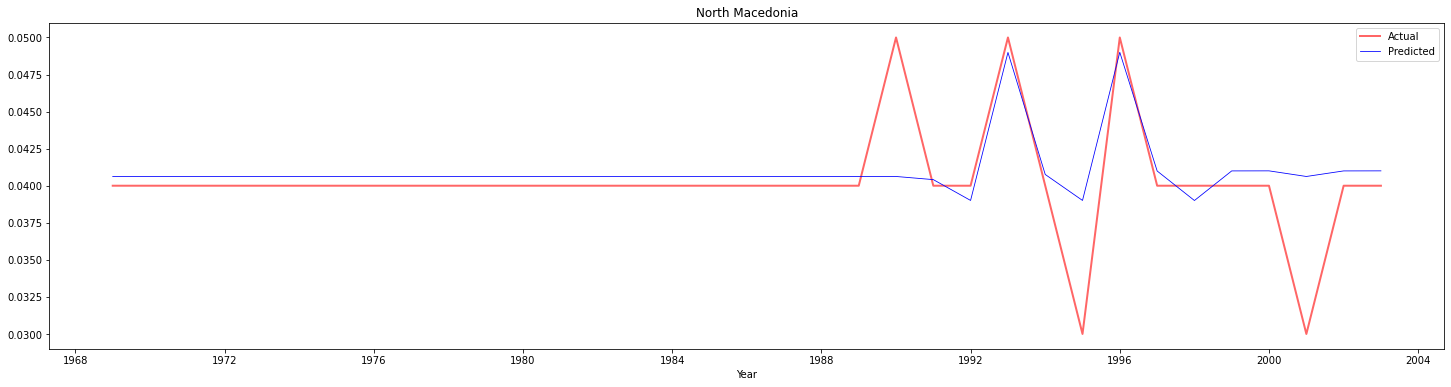

MAPE for training data: North Macedonia 4.038111810201177 %


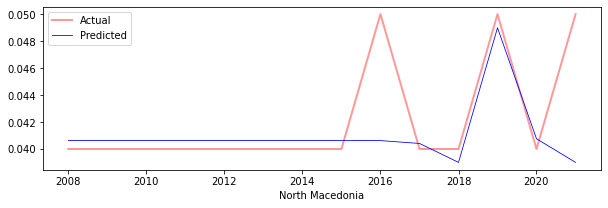

MAE for test data North Macedonia : 0.0020378633986961998
MAPE for test data  North Macedonia : 0.043311751867794054
RMSE for test data North Macedonia : 0.0039153106818007296
MSE for test data North Macedonia : 1.5329657735022895e-05


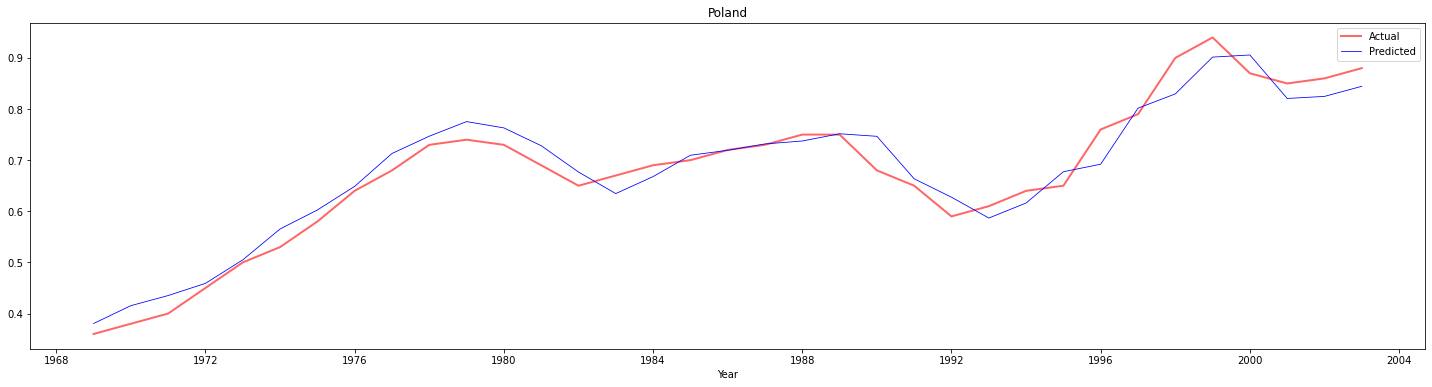

MAPE for training data: Poland 4.142426599617592 %


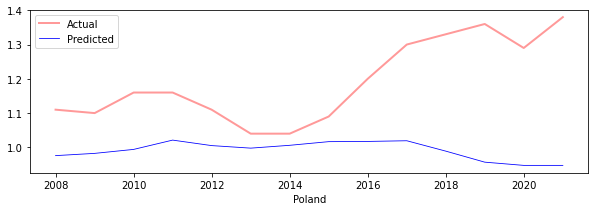

MAE for test data Poland : 0.19951745175221008
MAPE for test data  Poland : 0.1589441160397626
RMSE for test data Poland : 0.23803869434350072
MSE for test data Poland : 0.05666242000475857


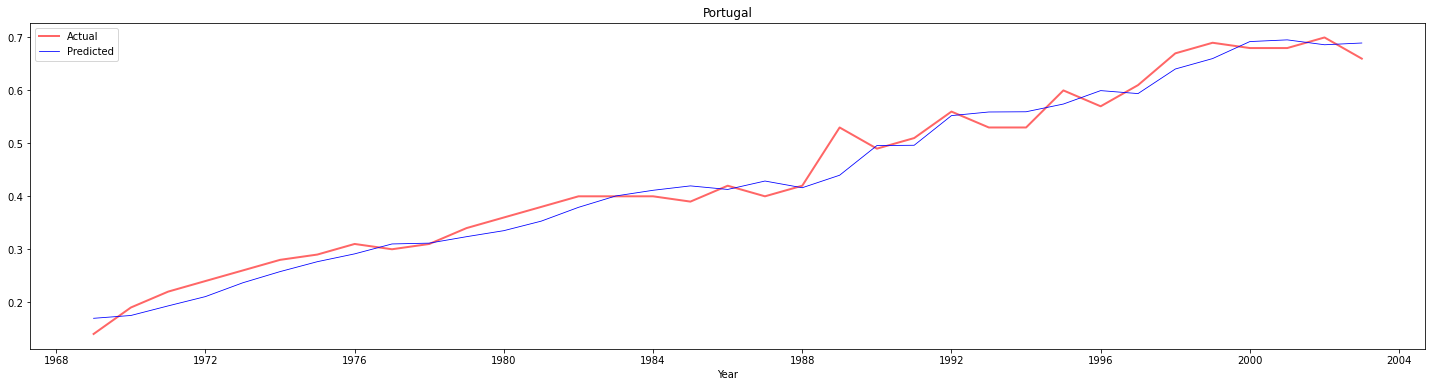

MAPE for training data: Portugal 5.545213703667818 %


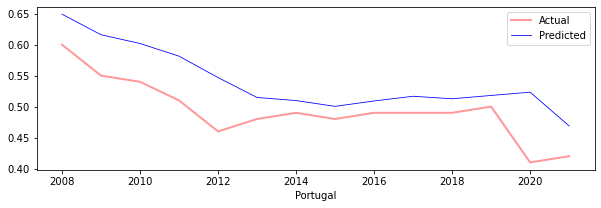

MAE for test data Portugal : 0.04702537835002626
MAPE for test data  Portugal : 0.09771005209684781
RMSE for test data Portugal : 0.054998141221951694
MSE for test data Portugal : 0.0030247955378697425


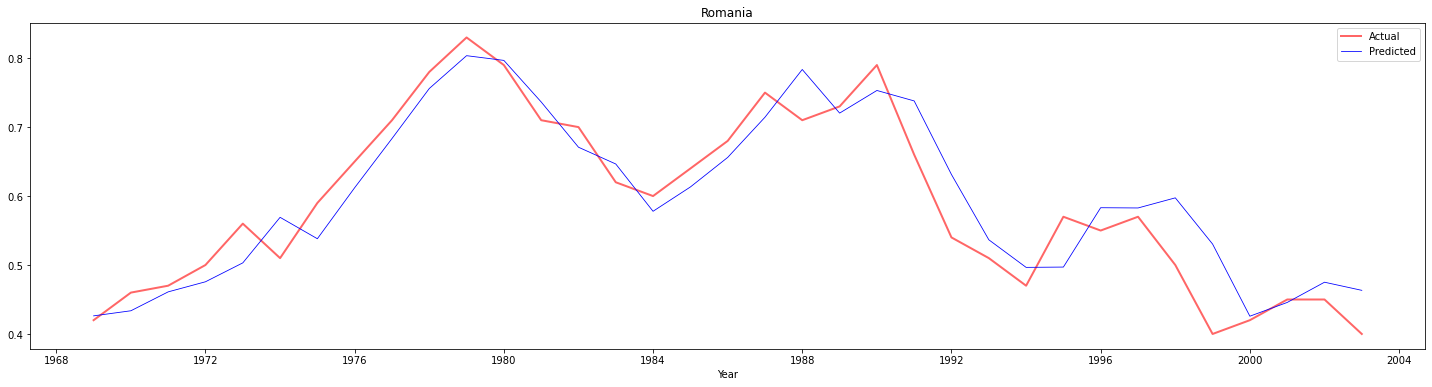

MAPE for training data: Romania 6.9234855248518095 %


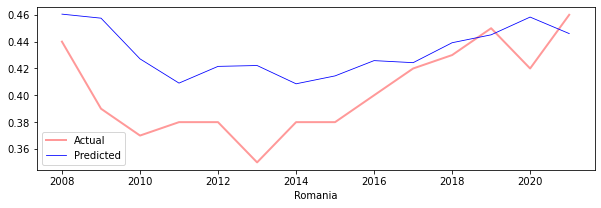

MAE for test data Romania : 0.03197597941475131
MAPE for test data  Romania : 0.08294187884934297
RMSE for test data Romania : 0.03826154094016953
MSE for test data Romania : 0.0014639455151162692


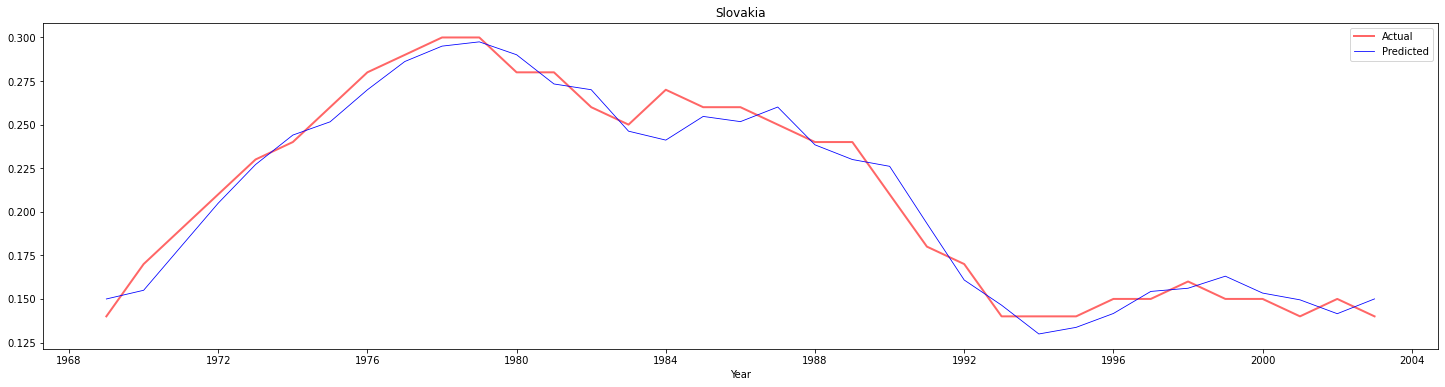

MAPE for training data: Slovakia 4.3265793959511765 %


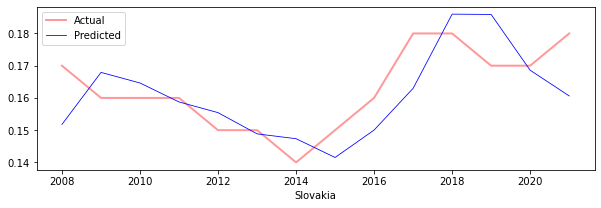

MAE for test data Slovakia : 0.008865132347240524
MAPE for test data  Slovakia : 0.0532885366568472
RMSE for test data Slovakia : 0.0107905350987333
MSE for test data Slovakia : 0.00011643564771699525


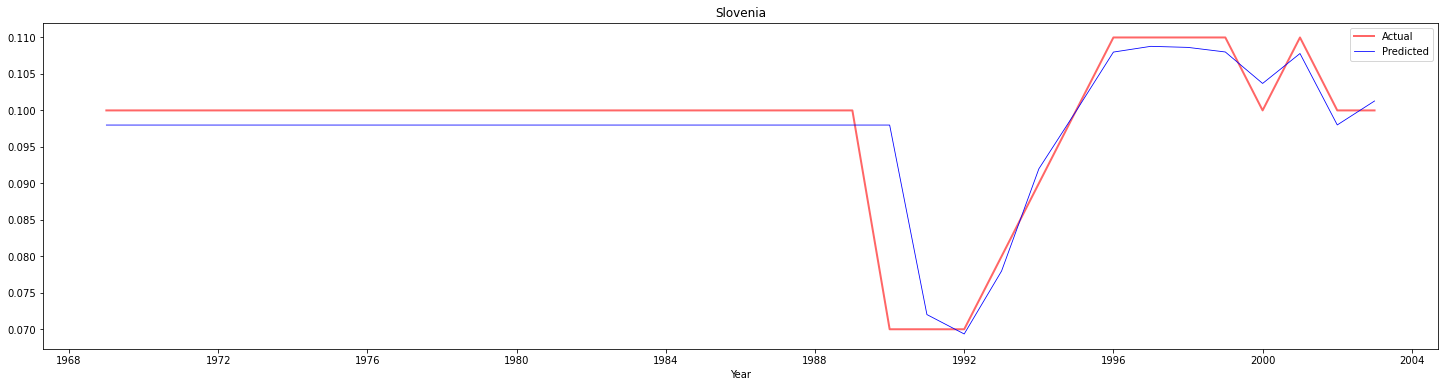

MAPE for training data: Slovenia 3.0198087054347664 %


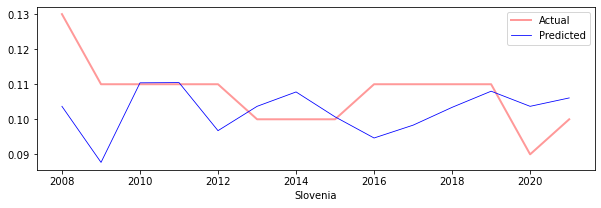

MAE for test data Slovenia : 0.00930611433294043
MAPE for test data  Slovenia : 0.08513700254201484
RMSE for test data Slovenia : 0.012198970146297146
MSE for test data Slovenia : 0.000148814872630249


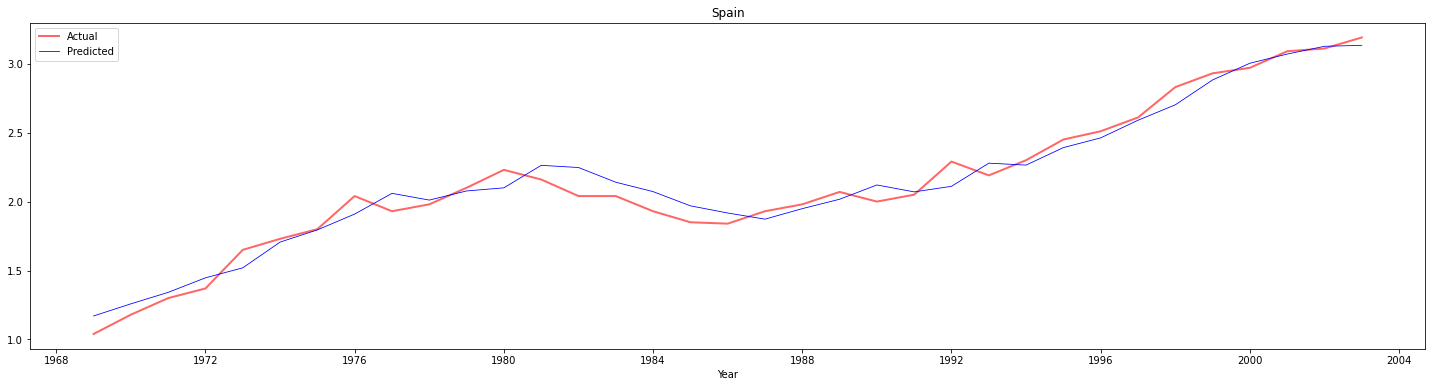

MAPE for training data: Spain 3.998555474297611 %


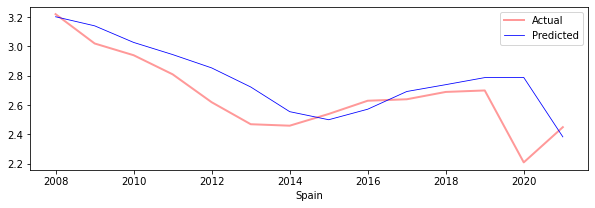

MAE for test data Spain : 0.133920696615208
MAPE for test data  Spain : 0.053635394492180084
RMSE for test data Spain : 0.19376632045125364
MSE for test data Spain : 0.037545386941217916


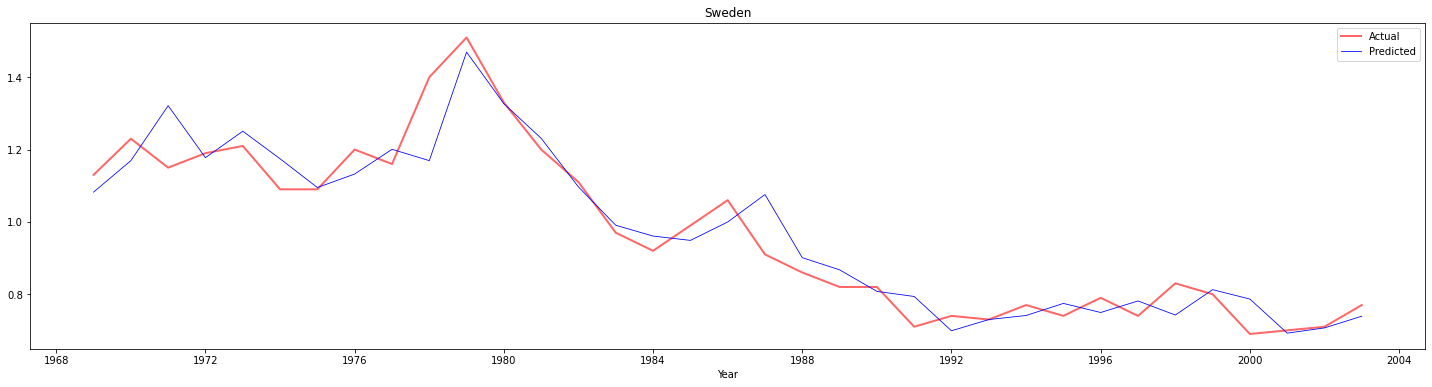

MAPE for training data: Sweden 5.251637118649555 %


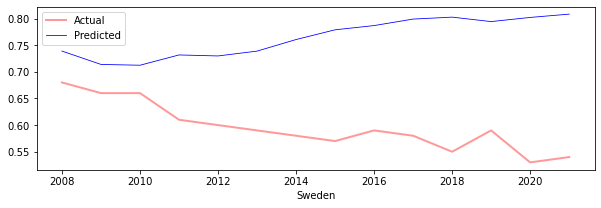

MAE for test data Sweden : 0.16912372564381586
MAPE for test data  Sweden : 0.29427881888867163
RMSE for test data Sweden : 0.18464318437014715
MSE for test data Sweden : 0.034093105534348155


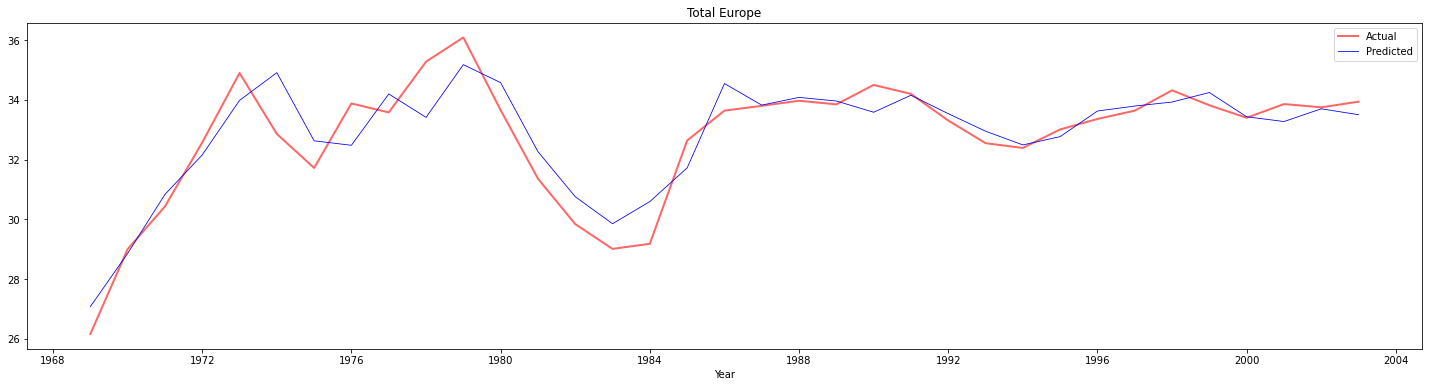

MAPE for training data: Total Europe 1.9268838977080975 %


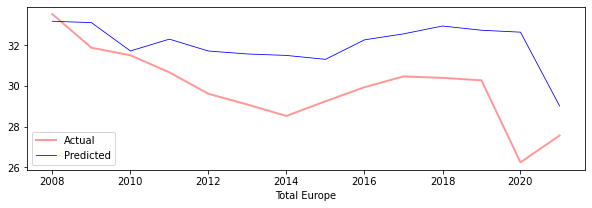

MAE for test data Total Europe : 2.165050907094647
MAPE for test data  Total Europe : 0.07481756276815409
RMSE for test data Total Europe : 2.581657944808098
MSE for test data Total Europe : 6.664957743990771


In [13]:
#Create training and testing datasets
warnings.filterwarnings('ignore')
dict_org = {}
dict_pred = {}
country_accuracy = {}
for name in range(len(country_name)):
    X = df1[df1['Country'] == country_name[name]][['Year','Value']]
    X["Value"] =[float(str(i).replace(',','.')) for i in X["Value"]] 
    X['Value']= X['Value'].fillna(X['Value'].mean())
    X['Value']=round(X['Value'],2) 
    X['Year'] = pd.to_datetime(X['Year']) #convert Year column to datetime
    X = X.set_index(X.columns[0])
    size = int(len(X) * 0.70)
    train, test = X[0:size], X[size:len(X)]

    #print(train,test)
    #print(train.shape,test.shape)
    # prepare data for standardization
    train_values = train['Value'].values
    test_values = test['Value'].values
    #print(train_values)
    train_values = train_values.reshape((len(train_values), 1))
    test_values = test_values.reshape((len(test_values), 1))
    #print(train_values)
    #print(test_values)
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_values) #Scale the training data to be in the range (0, 1)
    test_data = scaler.transform(test_values) #scale the testing data
    #print(train_data.shape)
    #print(test_data.shape)
    
    #Create data with time-steps
    timesteps=5
    train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
    #print(train_data_timesteps.shape)
    
    test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]

    x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
    x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]
    #print(x_train.shape, y_train.shape)
    #print(x_test.shape, y_test.shape)
    
    ## Implement SVR
    model = SVR(kernel='rbf',gamma=0.7, C=7, epsilon = 0.05)
    
    ## Prepare the model for the training data by calling the fit() function
    model.fit(x_train, y_train[:,0])
    SVR(C=7, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.7,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    
    ## Make model predictions
    y_train_pred = model.predict(x_train).reshape(-1,1)
    y_test_pred = model.predict(x_test).reshape(-1,1)
    #print(y_train_pred.shape, y_test_pred.shape)
    
    ##Evaluate your model 
    # Scaling the predictions
    y_train_pred = scaler.inverse_transform(y_train_pred)
    y_test_pred = scaler.inverse_transform(y_test_pred)

    #print(len(y_train_pred), len(y_test_pred))
    
    # Scaling the original values
    y_train = scaler.inverse_transform(y_train)
    y_test = scaler.inverse_transform(y_test)

    #print(len(y_train), len(y_test))
    
    ## Check model performance on training and testing data
    
    train_timestamps = train.index[timesteps-1:]
    
    test_timestamps = test.index[timesteps-1:]
    #print(train_timestamps)
    #print(test_timestamps)

    #print(len(train_timestamps), len(test_timestamps))
    plt.figure(figsize=(25,6))
    plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
    plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
    plt.legend(['Actual','Predicted'])
    plt.xlabel('Year')
    plt.title(country_name[name])
    plt.show()


    #Print model checking for training data
    print('MAPE for training data: {}'.format(country_name[name]), np.mean(np.abs((y_train - y_train_pred) / y_train))*100, '%')
    
    # Plot the predictions for testing data
    plt.figure(figsize=(10,3))
    plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.4)
    plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
    plt.legend(['Actual','Predicted'])
    plt.xlabel(country_name[name])
    plt.show()
    
    #Print model checking for testing data
    mse= mean_squared_error(y_test, y_test_pred)
    mae=mean_absolute_error(y_test, y_test_pred)
    rmse_test=sqrt(mse) #RMSE
    mape_test=np.mean(np.abs(y_test_pred-y_test)/np.abs(y_test)) #Mean absolute percentage error
    print('MAE for test data {} :'.format(country_name[name]),mae) 
    print('MAPE for test data  {} :'.format(country_name[name]),mape_test)
    print('RMSE for test data {} :'.format(country_name[name]),rmse_test)
    print('MSE for test data {} :'.format(country_name[name]),mse)
        